** I have limited internet bandwidth (rural area using cell hot spot).  Therefore, I will only be using the smaller dataset **

---
Fraud detection!
*   Explore the dataset.
*   Decide which features are important
*   Chart results
*   Do machine learning on the training set using 2 different algorythms.
*   Test the (2) models on the test set





In [0]:
# Load the nerd trinity
import numpy as np
import pandas as pd
import sklearn as sk

from sklearn.preprocessing import scale

# Load plotting tool
import matplotlib.pyplot as plt
import random

from pandas.plotting import scatter_matrix 
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import BayesianRidge


In [2]:
# Load Kaggle dataset
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,69394.0,1.064630,-0.272178,0.744352,1.349040,-0.040236,1.614714,-0.567454,0.450953,0.944825,-0.283213,-0.311956,1.722339,0.674416,-0.771856,-2.405754,-0.645053,0.054145,-0.572917,0.888932,-0.050538,-0.413865,-0.768865,-0.107540,-1.130239,0.568315,-0.459958,0.086035,0.013312,39.00,0
1,40264.0,1.337211,0.732318,-0.890101,0.663551,0.640353,-0.946402,0.484662,-0.341371,-0.314621,-0.751150,-0.325198,0.300203,1.411955,-1.616791,0.880994,0.731782,0.654664,0.373441,-0.059298,0.043634,-0.193502,-0.429382,-0.203296,-0.529892,0.728465,0.416383,-0.022935,0.037277,0.76,0
2,168911.0,1.832868,-1.124768,-0.953235,-0.509344,-1.224775,-1.836767,-0.029093,-0.505134,-0.614514,0.720107,0.262555,-0.002181,0.285689,0.032608,-0.007822,0.627330,0.559602,-2.134447,0.357782,0.278040,0.102350,-0.093122,0.260196,0.929537,-0.380575,-0.502462,-0.061701,-0.018201,176.55,0
3,156159.0,-1.220152,1.494320,-1.625384,-0.700715,0.357680,-0.386964,0.218182,0.921840,-0.181396,-0.511173,0.324902,0.613898,-0.147172,-0.290497,-0.896566,0.906020,0.286290,0.503347,0.153249,0.057175,-0.307738,-0.921772,0.073462,0.086260,-0.272412,0.133813,0.227989,-0.000894,44.99,0
4,589.0,1.245658,0.465420,0.219100,1.351277,-0.047654,-0.828626,0.400434,-0.309240,-0.143431,-0.041650,-0.418248,1.005824,1.174668,-0.010795,-0.153772,-0.437975,-0.186802,-0.599194,-0.137635,-0.088512,-0.021622,0.168910,-0.160163,0.449777,0.884479,-0.265335,0.018161,0.016244,1.00,0


In [3]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


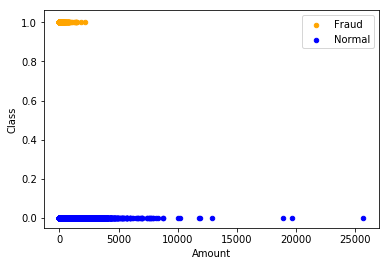

In [4]:
# Show Siraj's chart
ax = fraud.plot.scatter(x='Amount',y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount',y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

**Charting of the Features**

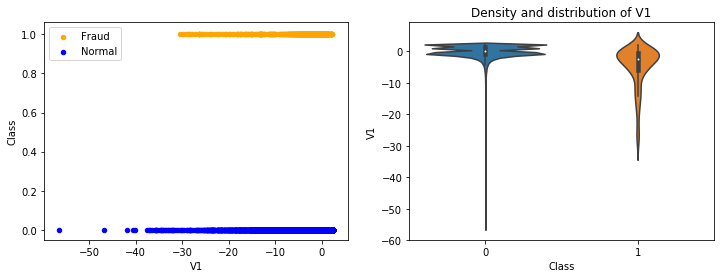

KeyboardInterrupt: ignored

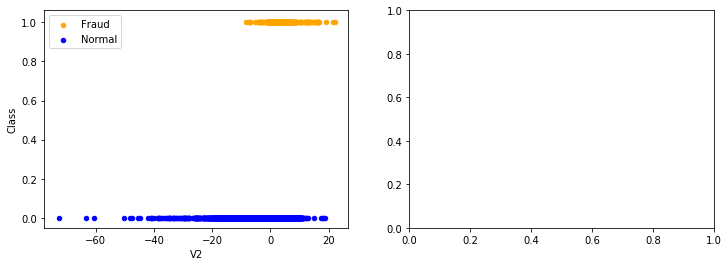

In [36]:

import seaborn as sns
# Explore the features via LOOP
i = 1
while i <= 28:
  fig, axs = plt.subplots(1,2)
  fig.set_size_inches(12, 4)
  columnname = 'V' + str(i)
  ax = fraud.plot.scatter(x=columnname,y='Class', color='Orange', label='Fraud', ax=axs[0])
  non_frauds.plot.scatter(x=columnname,y='Class', color='Blue', label='Normal', ax=axs[0])

  columnname = 'V' + str(i)
  viz=sns.violinplot(data=df, x='Class', y=columnname)
  viz.set_title('Density and distribution of ' + columnname)
  plt.show()

  i = i + 1

Going to pick (3) features that look the LEAST useful with ranges too similar to the legit transactions to drop them out: 
V13, V15, V24

**Start the Machine Learning!**

In [0]:
# start Machine learning
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

In [0]:
x = df.iloc[:, :-1] # doing this to remove the last column.  Since this is "tagged" data then this is a "supervised" learning exercise.
y = df['Class'] # splits out the Class value into it's own matrix.  Keeps the class value away from the data like all good opressive class hierarchies would. :)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35) # Strip out 35% of the data to "test" against later.


In [7]:
#Linear regression against the WHOLE dataset
logistic = linear_model.LogisticRegression(C=1e5).fit(X_train,y_train)
print('Score:', logistic.score(X_test,y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9989867881183351


In [8]:
y_linear_predicted = np.array(logistic.predict(X_test))
print(y_linear_predicted)


[0 0 0 ... 0 0 0]


In [9]:
r2_score(y_test, y_linear_predicted)

0.4251213596667933

In [10]:


mean_squared_error(y_test, y_linear_predicted)

0.0010132118816648776

In [16]:
#Show results of classification in the test data set
predicted_fraud = y_test[logistic.predict(X_test) == 1]
predicted_non_frauds = y_test[logistic.predict(X_test) == 0]
print(len(predicted_fraud))
print(len(predicted_non_frauds))


138
99545


In [17]:
pd.crosstab(y_test, logistic.predict(X_test), rownames=['True'], colnames=['IsFraud'], margins=True)

IsFraud,0,1,All
True,,,
0,99480,23,99503
1,65,115,180
All,99545,138,99683


In [0]:
# Removing unhelpful features V13, V15, V24 as their values are completely contained inside the legit value ranges
x_Refined =  x[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V14','V16','V17','V18','V19','V20','V21','V22','V23','V25','V26','V27','V28','Amount']].copy() # doing this to remove the last column.  Since this is "tagged" data then this is a "supervised" learning exercise.

X_train_Refined, X_test_Refined, y_train, y_test = train_test_split(x_Refined, y, test_size=0.35) # Strip out 35% of the data to "test" against later.

In [22]:
#Linear regression against the REFINED dataset
logistic = linear_model.LogisticRegression(C=1e5).fit(X_train_Refined,y_train)
print('Score:', logistic.score(X_test_Refined,y_test))
pd.crosstab(y_test, logistic.predict(X_test_Refined), rownames=['True'], colnames=['IsFraud'], margins=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9989767563175266


IsFraud,0,1,All
True,,,
0,99467,44,99511
1,58,114,172
All,99525,158,99683


My "Refined" results are worse than what we started with.  Apparently my efforts to refine sent me backwards.

In [33]:
#Quadratic Regression 2 -- confidence output: 0%
poly2 = make_pipeline(PolynomialFeatures(2), Ridge()).fit(X_train, y_train)
poly2score =  poly2.score(X_test,y_test)
print('Quadratic Regression 2, Score:',poly2score)

# Couldn't get crosstab below to output.  Just ran and ran.
#pd.crosstab(y_test, poly2.predict(X_test), rownames=['True'], colnames=['IsFraud'], margins=True)

#Quadratic Regression 2 REFINED -- confidence output: 70% Much better!
poly2_Refined = make_pipeline(PolynomialFeatures(2), Ridge()).fit(X_train_Refined, y_train)
poly2score_Refined =  poly2_Refined.score(X_test_Refined,y_test)
print('Quadratic Regression 2 REFINED, Score:',poly2score_Refined)

# Couldn't get crosstab below to output.  Just ran and ran.
#pd.crosstab(y_test, poly2_Refined.predict(X_test_Refined), rownames=['True'], colnames=['IsFraud'], margins=True)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9028e-26): result may not be accurate.
  overwrite_a=True).T


Quadratic Regression 2, Score: -0.0031091780780660994


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.48248e-26): result may not be accurate.
  overwrite_a=True).T


Quadratic Regression 2 REFINED, Score: 0.7025601255859283


KeyboardInterrupt: ignored

In [34]:
#KNN regression -- confidence output: -47%?!
knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
print('KNN, Score:', knn.score(X_test,y_test))

# Couldn't get crosstab below to output.  Just returns nothing.
pd.crosstab(y_test, knn.predict(X_test), rownames=['True'], colnames=['IsFraud'], margins=True)

#KNN regression REFINED Features -- confidence output: 0%?!
knn_Refined = KNeighborsRegressor(n_neighbors=2).fit(X_train_Refined, y_train)
print('KNN REFINED, Score:', knn_Refined.score(X_test_Refined,y_test))

#Returns, but I admit, I have no idea why there is now a 0.5 in the list.  Did it find 3 groupings?
pd.crosstab(y_test, knn_Refined.predict(X_test_Refined), rownames=['True'], colnames=['IsFraud'], margins=True)



KNN, Score: -0.47492866571020675
KNN REFINED, Score: -0.0017284521309204326


IsFraud,0.0,0.5,1.0,All
True,,,,
0,99405,104,2,99511
1,140,16,16,172
All,99545,120,18,99683


Future steps:

Include some sampling techniques: 
https://arxiv.org/pdf/1608.06048.pdf

Review current high scorer in the Kaggle competition:
https://github.com/RoyMachineLearning/IEEE-CIS-Fraud-Detection

Figure out how to load the larger data set via a Google Drive link, or directly from Kaggle via a link to be able to handle larger data set load repeatedly without using so much bandwidth.

Google Drive link:
https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

Direct from Kaggle?
https://forums.fast.ai/t/how-to-download-data-for-lesson-2-from-kaggle-for-planet-competition/7684

https://colab.research.google.com/drive/1eufc8aNCdjHbrBhuy7M7X6BGyzAyRbrF
